## 4.2 손실함수

### 4.2.1 평균 제곱 오차

In [1]:
def mean_squared_error(y, t):
    return 0.5*np.sum((y-t)**2)

정답이 2이고 신경망의 출력도는 2에서 가장 높은 경우

In [3]:
import numpy as np

t=[0,0,1,0,0,0,0,0,0,0]  # 정답은 2
y=[0.1, 0.05, 0.6, 0.0, 0.05, 0.1, 0.0, 0.1, 0.0, 0.0]
mean_squared_error(np.array(y), np.array(t))

0.09750000000000003

답은 2이고 신경망의 출력은 7에서 가장 높은 경우

In [4]:
y=[0.1, 0.05, 0.1, 0.0, 0.05, 0.1, 0.0, 0.6, 0.0, 0.0]
mean_squared_error(np.array(y), np.array(t))

0.5975

첫번째 예의 손실함수가 작고, 정답 레이블과의 오차도 작다. 

즉, 평균 제곱 오차를 기준으로는(오차가 작다) 첫번째 추정 결과가 정답에 더 가깝다고 판단할 수 있다.

### 4.2.2 교차 엔트로피 오차

In [5]:
def cross_entrophy_error(y, t):
    delta=1e-7
    return -np.sum(t*np.log(y+delta))

아주 작은 값인 델타를 더한 이유는 np.log에 0을 입력하면 마이너스 무한대가 되기 때문에 계산을 진행할 수 없다. 그래서 델타를 더해서 0이 되지 않도록 한다.

In [8]:
t=[0,0,1,0,0,0,0,0,0,0]  # 정답은 2
y=[0.1, 0.05, 0.6, 0.0, 0.05, 0.1, 0.0, 0.1, 0.0, 0.0]
cross_entrophy_error(np.array(y), np.array(t))

0.510825457099338

In [9]:
y=[0.1, 0.05, 0.1, 0.0, 0.05, 0.1, 0.0, 0.6, 0.0, 0.0]
cross_entrophy_error(np.array(y), np.array(t))

2.302584092994546

결과가 작은 첫번째가 정답일 가능성이 높다고 판단. 즉 MSE와 같은 결과

### 4.2.3 미니배치 학습

In [ ]:
import sys, os
sys.path.append(os.pardir)
import numpy as np
from dataset.mnist import load_mnist

(x_train, t_train), (x_test, t_test)=load_mnist(normalize=True, one_hot_label=True)

print(x_train.shape)
print(t_train.shape)

1. load_mnist 함수는 MNIST 데이터셋을 읽어노는 함수이다. 이 함수는 dataset/mnist.py 파일 안에 있다.
2. 호출할 때 `one_hot_label=True`로 지정하여 원핫 인코딩(정답 위치 원소만 1, 나머지는 0인 배열)로 호출
3. 훈련데이터는 60000개, 784차원(원래는 28*28) : x_train은 (60000, 784)
4. 정답 레이블은 10차원 데이터 : (60000, 10)

#### 훈련데이터에서 무작위로 10장만 빼내기 : `np.random.choice()`

In [ ]:
train_size=x_train.shape[0]
batch_size=10
batch_mask=np.random.choice(train_size, batch_size)
x_batch=x_train[batch_mask]
t_batxh=t_train[batxh_mask]

In [ ]:
np.random.choice(60000,10)

### 4.2.4 교차 엔트로피 오차 구현하기

In [11]:
def cross_entropy_error(y, t):
    if y.ndim==1:
        t=t.reshape(1, t.size)
        y=y.reshape(1, y.size)
        
    batch_size=y.shape[0]
    return -np.sum(t*np.log(y)) / batch_size

y는 신경망 출력, t는 정답 레이블. y가 1차원이면 데이터의 형상을 바꿔준다. 그리고 배치의 크기로 나눠 정규화하고 이미지 1장당 평균의 교차 엔트로피 오차 계산한다.

원핫 인코딩이 아니라 숫자 레이블이면 다음과 같이 구한다. 

In [12]:
def cross_entropy_error(y, t):
    if y.ndim==1:
        t=t.reshape(1, t.size)
        y=y.reshape(1, y.size)
        
    batch_size=y.shape[0]
    return -np.sum(np.log(y[np.arange(batch_size), t])) / batch_size

원핫 인코딩일 때 t가 0인 원소는 교차 엔트로피의 오차도 0이므로 무시 가능. 즉, 정답에 해당하는 신경망의 출력만으로 교차 엔트로피 오차 계산 가능. 

## 4.3 수치 미분

### 4.3.1 미분

In [13]:
# 나쁜 구현
def numerical_diff(f, x):
    h=10e-50    # 작은 값
    return (f(x+h) -f(x)) / h

나쁜 구현인 이유
1. 반올림 오차
2. 진정한 미분은 x의 기울기 이지만 이 구현은 x+h와 x 사이의 기울기이므로 이 둘이 같은 값이 아니다.

In [15]:
np.float32(1e-50) # 반올림 오차 : 작은 값은 생략되어 최종 결과에 오차가 생긴다.

0.0

In [16]:
def numerical_diff(f, x):
    h=1e-4    # 작은 값
    return (f(x+h) -f(x)) / (2*h)

### 4.3.2 수치 미분의 예

In [17]:
def function_1(x):
    return 0.01*x**2+0.1*x

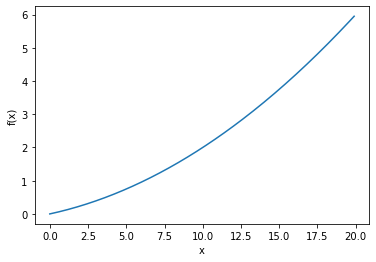

In [19]:
import numpy as np
import matplotlib.pylab as plt

x=np.arange(0.0, 20.0, 0.1)
y=function_1(x)
plt.xlabel("x")
plt.ylabel("f(x)")
plt.plot(x, y)
plt.show()

In [20]:
numerical_diff(function_1, 5)

0.10000049999958627

In [21]:
numerical_diff(function_1, 10)

0.1500004999988036

## 4.4 기울기

In [24]:
def numerical_gradient(f, x):
    h=1e-4   # 0.0001
    grad=np.zeros_like(x) # x와 같은 모양인 0인 배열 만든다. 
    
    for
    idx in range(x.size):
        tmp_val=x[idx]
        # f(x+h) 계산한다
        x[idx]=tmp_val+h
        fxh1=f(x)
        
        # f(x-h)
        x[idx]=tmp_val-h
        fxh2=f(x)
        
        grad[idx]=(fxh1-fxh2)/(2*h)
        x[idx]=tmp_val
        
    return grad
        

In [23]:
def function_2(x):
    return x[0]**2+x[1]**2

In [26]:
numerical_gradient(function_2, np.array([3.0, 4.0]))

array([6., 8.])

### 4.4.1 경사법

#### 경사 하강법

In [1]:
def gradient_descent(f, init_x, lr=0.01, step_num=100):
    x=init_x
    
    for i in  range(step_num):
        grad=numerical_gradient(f, x)
        x-=lr*grad
    return x

f는 최적화하려는 함수, init_x는 초기값, lr는 learning rate를 의미하는 학습률,step_num은 경사법에 따른 반복 횟수이다. 
함수의 기울기는 numerical_gradient(f,x)로 구하고, 그 기울기에 학습률을 곱한 값으로 갱신하는 처리를 step_num번 반복한다.

### 4.4.2 신경망에서의 기울기

In [1]:
import sys, os
sys.path.append(os.pardir)
import numpy as np
from common.functions import softmax, cross_entropy_error
from common.gradient import numerical_gradient

class simpleNet:
    def __init__(self):
        self.W=np.random.randn(2,3)
        
    def predict(self, x):
        return np.dot(x, self.W)
    
    def loss(self, x, t):
        z=self.predict(x)
        y=softmax(z)
        loss=cross_entropy_error(y, t)
        
        return loss

In [2]:
net=simpleNet()

In [3]:
print(net.W)

[[-0.01687039 -0.20106522 -0.77992415]
 [ 0.69752556  0.48051095  0.8207258 ]]


In [4]:
x=np.array([0.6, 0.9])
p=net.predict(x)
print(p)

[0.61765077 0.31182073 0.27069873]


In [5]:
np.argmax(p)

0

In [6]:
t=np.array([0,0,1])
net.loss(x,t)

1.240322152868038

In [7]:
f=lambda w:net.loss(x, t)
dw=numerical_gradient(f, net.W)

### 4.5.1 2층 신경망 클래스 구현하기

In [11]:
# coding: utf-8
import sys, os
sys.path.append(os.pardir)  # 부모 디렉터리의 파일을 가져올 수 있도록 설정
from common.functions import *
from common.gradient import numerical_gradient


class TwoLayerNet:

    def __init__(self, input_size, hidden_size, output_size, weight_init_std=0.01):
        # 가중치 초기화
        self.params = {}
        self.params['W1'] = weight_init_std * np.random.randn(input_size, hidden_size)
        self.params['b1'] = np.zeros(hidden_size)
        self.params['W2'] = weight_init_std * np.random.randn(hidden_size, output_size)
        self.params['b2'] = np.zeros(output_size)

    def predict(self, x):
        W1, W2 = self.params['W1'], self.params['W2']
        b1, b2 = self.params['b1'], self.params['b2']
    
        a1 = np.dot(x, W1) + b1
        z1 = sigmoid(a1)
        a2 = np.dot(z1, W2) + b2
        y = softmax(a2)
        
        return y
        
    # x : 입력 데이터, t : 정답 레이블
    def loss(self, x, t):
        y = self.predict(x)
        
        return cross_entropy_error(y, t)
    
    def accuracy(self, x, t):
        y = self.predict(x)
        y = np.argmax(y, axis=1)
        t = np.argmax(t, axis=1)
        
        accuracy = np.sum(y == t) / float(x.shape[0])
        return accuracy
        
    # x : 입력 데이터, t : 정답 레이블
    def numerical_gradient(self, x, t):
        loss_W = lambda W: self.loss(x, t)
        
        grads = {}
        grads['W1'] = numerical_gradient(loss_W, self.params['W1'])
        grads['b1'] = numerical_gradient(loss_W, self.params['b1'])
        grads['W2'] = numerical_gradient(loss_W, self.params['W2'])
        grads['b2'] = numerical_gradient(loss_W, self.params['b2'])
        
        return grads
        
    def gradient(self, x, t):
        W1, W2 = self.params['W1'], self.params['W2']
        b1, b2 = self.params['b1'], self.params['b2']
        grads = {}
        
        batch_num = x.shape[0]
        
        # forward
        a1 = np.dot(x, W1) + b1
        z1 = sigmoid(a1)
        a2 = np.dot(z1, W2) + b2
        y = softmax(a2)
        
        # backward
        dy = (y - t) / batch_num
        grads['W2'] = np.dot(z1.T, dy)
        grads['b2'] = np.sum(dy, axis=0)
        
        da1 = np.dot(dy, W2.T)
        dz1 = sigmoid_grad(a1) * da1
        grads['W1'] = np.dot(x.T, dz1)
        grads['b1'] = np.sum(dz1, axis=0)

        return grads


### 4.5.2 미니배치 학습 구현하기

Converting train-images-idx3-ubyte.gz to NumPy Array ...
Done
Converting train-labels-idx1-ubyte.gz to NumPy Array ...
Done
Converting t10k-images-idx3-ubyte.gz to NumPy Array ...
Done
Converting t10k-labels-idx1-ubyte.gz to NumPy Array ...
Done
Creating pickle file ...
Done!
train acc, test acc | 0.09736666666666667, 0.0982
train acc, test acc | 0.7863833333333333, 0.7927
train acc, test acc | 0.8742, 0.8784
train acc, test acc | 0.8987666666666667, 0.9014
train acc, test acc | 0.9077833333333334, 0.9098
train acc, test acc | 0.9137333333333333, 0.9141
train acc, test acc | 0.91925, 0.9188
train acc, test acc | 0.9228833333333334, 0.9239
train acc, test acc | 0.9261833333333334, 0.927
train acc, test acc | 0.9303166666666667, 0.9304
train acc, test acc | 0.9321833333333334, 0.9322
train acc, test acc | 0.9359166666666666, 0.9357
train acc, test acc | 0.9376, 0.9364
train acc, test acc | 0.9399833333333333, 0.9386
train acc, test acc | 0.9421833333333334, 0.9406
train acc, test acc | 0

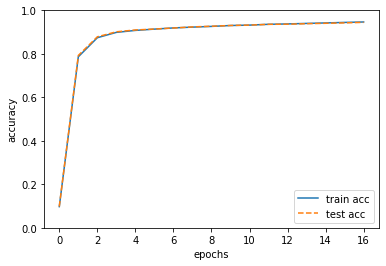

In [12]:
# coding: utf-8
import sys, os
sys.path.append(os.pardir)  # 부모 디렉터리의 파일을 가져올 수 있도록 설정
import numpy as np
import matplotlib.pyplot as plt
from dataset.mnist import load_mnist
from two_layer_net import TwoLayerNet

# 데이터 읽기
(x_train, t_train), (x_test, t_test) = load_mnist(normalize=True, one_hot_label=True)

network = TwoLayerNet(input_size=784, hidden_size=50, output_size=10)

# 하이퍼파라미터
iters_num = 10000  # 반복 횟수를 적절히 설정한다.
train_size = x_train.shape[0]
batch_size = 100   # 미니배치 크기
learning_rate = 0.1

train_loss_list = []
train_acc_list = []
test_acc_list = []

# 1에폭당 반복 수
iter_per_epoch = max(train_size / batch_size, 1)

for i in range(iters_num):
    # 미니배치 획득
    batch_mask = np.random.choice(train_size, batch_size)
    x_batch = x_train[batch_mask]
    t_batch = t_train[batch_mask]
    
    # 기울기 계산
    #grad = network.numerical_gradient(x_batch, t_batch)
    grad = network.gradient(x_batch, t_batch)
    
    # 매개변수 갱신
    for key in ('W1', 'b1', 'W2', 'b2'):
        network.params[key] -= learning_rate * grad[key]
    
    # 학습 경과 기록
    loss = network.loss(x_batch, t_batch)
    train_loss_list.append(loss)
    
    # 1에폭당 정확도 계산
    if i % iter_per_epoch == 0:
        train_acc = network.accuracy(x_train, t_train)
        test_acc = network.accuracy(x_test, t_test)
        train_acc_list.append(train_acc)
        test_acc_list.append(test_acc)
        print("train acc, test acc | " + str(train_acc) + ", " + str(test_acc))

# 그래프 그리기
markers = {'train': 'o', 'test': 's'}
x = np.arange(len(train_acc_list))
plt.plot(x, train_acc_list, label='train acc')
plt.plot(x, test_acc_list, label='test acc', linestyle='--')
plt.xlabel("epochs")
plt.ylabel("accuracy")
plt.ylim(0, 1.0)
plt.legend(loc='lower right')
plt.show()


In [14]:
 # 1에폭당 정확도 계산
   # if i % iter_per_epoch == 0:
    #    train_acc = network.accuracy(x_train, t_train)
    #    test_acc = network.accuracy(x_test, t_test)
    #    train_acc_list.append(train_acc)
    #    test_acc_list.append(test_acc)
    #    print("train acc, test acc | " + str(train_acc) + ", " + str(test_acc))

위의 코드는 1에폭마다 모든 훈련데이터와 시험데이터에 대한 정확도를 계산하고, 그 결과를 기록한 것이다.
그래프를 살펴보면 학습이 진행될수록(에폭이 진행될수록) 정확도가 좋아지고 있다. 
두 선이 겹쳐진 것으로 보아 두 정확도에는 차이가 없다. 
즉, 오버피팅이 일어나지 않은것을 알 수 있다